Text(0, 0.5, 'CO2 concentration  %')

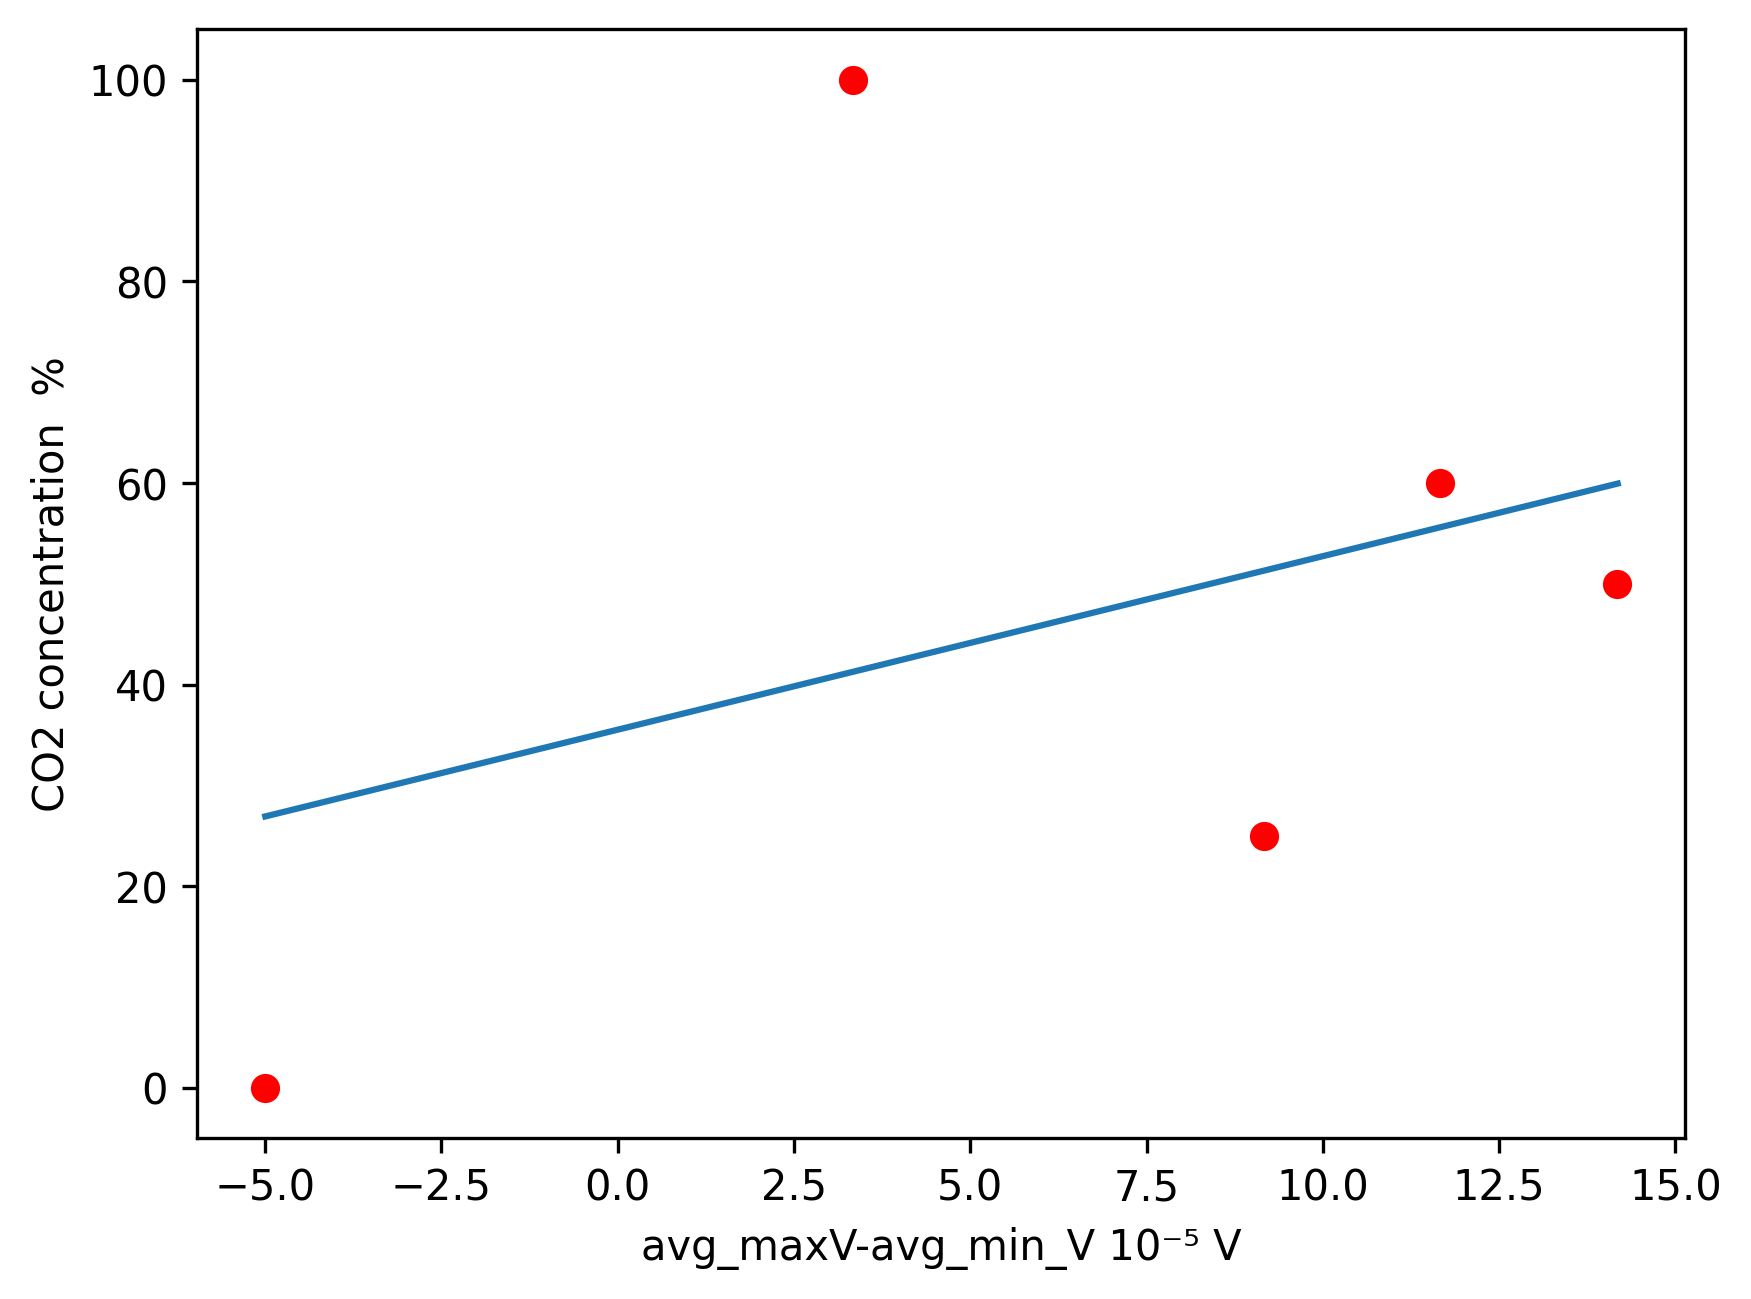

In [9]:
#Showing the linear regression
import os
import pickle as pkl
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt

cwd  = os.getcwd()
data_dir =   cwd+'\\training\\'


# function to convert to superscript
def get_super(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    super_s = "ᴬᴮᶜᴰᴱᶠᴳᴴᴵᴶᴷᴸᴹᴺᴼᴾQᴿˢᵀᵁⱽᵂˣʸᶻᵃᵇᶜᵈᵉᶠᵍʰᶦʲᵏˡᵐⁿᵒᵖ۹ʳˢᵗᵘᵛʷˣʸᶻ⁰¹²³⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾"
    res = x.maketrans(''.join(normal), ''.join(super_s))
    return x.translate(res)

l = []
c = []
corr_min = []
for root, dirs, files in os.walk(data_dir):
    for names in files:
        l.append(names)
for file  in l:
    with open(data_dir+file, 'rb') as f:
        fetch = pkl.load(f)
        c.append(fetch[3])
        corr_min.append(fetch[2])
corr_min = np.array(corr_min)
c = np.array(c)  
m1 = linregress(corr_min,c)
lin_model = lambda x: m1.intercept+x*m1.slope  
dip = np.linspace(min(corr_min)*.999,max(corr_min)*1.001,100)
conc = np.vectorize(lin_model)(dip)

plt.figure(dpi=300)
plt.plot(dip*10**5,conc)
plt.scatter(corr_min*10**5,c,c="r")
plt.xlabel(f"avg_maxV-avg_min_V 10{get_super('-5')} V")
plt.ylabel("CO2 concentration  %")